# Klasifikasi topik dengan LDA

## Dataset

dataset ini di ambil dari web crawling web artikel tempo, saya telah mengambil 1200 data berita, data ini telah melalui preprocessing yang berisi penghilangan stopwords, lematisasi, dan penghilangan tanda baca dan tokenisasi,

dataset ini memiliki jumlah kategori yang seimbang, karena selain akan digunakan untuk klasifikasi LDA, dataset ini juga akan digunakan untuk klasifikasi berbasis supervised learning seperti knn, naive bayes, atau decision tree dan turunan nya

In [ ]:
import pandas as pd

# Tentukan nama file input yang akan dianalisis
NAMA_FILE_INPUT = 'berita_tempo_processed.csv'

print(f"--- Menganalisis Isi Awal dari '{NAMA_FILE_INPUT}' ---")

try:

    df = pd.read_csv(NAMA_FILE_INPUT)

    kategori_unik = df['kategori'].unique()
    print("\nKategori yang ditemukan:")
    # Mengubah array menjadi list agar lebih rapi saat dicetak
    print(list(kategori_unik))

    print("\nJumlah data per kategori:")

    distribusi_kategori = df['kategori'].value_counts()
    print(distribusi_kategori)

except FileNotFoundError:
    print(f"\nERROR: File '{NAMA_FILE_INPUT}' tidak ditemukan. Pastikan Anda sudah menjalankan skrip scraper sebelumnya.")
except Exception as e:
    print(f"\nTerjadi error saat membaca file: {e}")

--- Menganalisis Isi Awal dari 'berita_tempo_processed.csv' ---

Kategori yang ditemukan:
['politik', 'sepakbola', 'ekonomi', 'digital']

Jumlah data per kategori:
kategori
politik      300
sepakbola    300
ekonomi      300
digital      300
Name: count, dtype: int64


## load data dan jadikan ke vektor

In [ ]:

import pandas as pd
from gensim.models import Word2Vec

# --- 1. Memuat Data yang Sudah Diproses ---
NAMA_FILE_PROCESSED = 'berita_tempo_processed.csv'

try:
    df = pd.read_csv(NAMA_FILE_PROCESSED)
    print(f"✅ Berhasil memuat data dari '{NAMA_FILE_PROCESSED}'.")

    # Word2Vec butuh input berupa list of list of tokens.
    # Kita ubah kembali kolom 'isi_final' menjadi format tersebut.
    # .dropna() untuk menghapus baris kosong, .split() untuk memecah kalimat jadi token.
    sentences = df['isi_final'].dropna().apply(lambda x: x.split()).tolist()

except FileNotFoundError:
    print(f"❌ ERROR: File '{NAMA_FILE_PROCESSED}' tidak ditemukan.")
    sentences = []

# --- 2. Melatih Model Word2Vec ---
if sentences:
    print("\n--- Melatih Model Word2Vec ---")

    # Latih model.
    # vector_size=100: Setiap kata akan direpresentasikan oleh vektor 100 dimensi.
    # window=5: Konteks kata adalah 5 kata sebelum dan 5 kata sesudahnya.
    # min_count=2: Abaikan kata yang hanya muncul sekali.
    word2vec_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=2, workers=4)

    print("✅ Model Word2Vec berhasil dilatih.")

    # --- 3. Menguji Model ---
    print("\n--- Contoh Hasil Word Embedding ---")

    # Ambil contoh kata dari vocabulary model
    if 'prabowo' in word2vec_model.wv:
        print("Kata-kata yang paling mirip dengan 'prabowo':")
        similar_words = word2vec_model.wv.most_similar('prabowo', topn=5)
        for word, score in similar_words:
            print(f"- {word} (skor: {score:.2f})")
    else:
        print("Kata 'prabowo' tidak ditemukan dalam vocabulary model (mungkin karena frekuensinya rendah).")

    if 'bola' in word2vec_model.wv:
        print("\nKata-kata yang paling mirip dengan 'bola':")
        similar_words = word2vec_model.wv.most_similar('bola', topn=5)
        for word, score in similar_words:
            print(f"- {word} (skor: {score:.2f})")

✅ Berhasil memuat data dari 'berita_tempo_processed.csv'.

--- Melatih Model Word2Vec ---
✅ Model Word2Vec berhasil dilatih.

--- Contoh Hasil Word Embedding ---
Kata-kata yang paling mirip dengan 'prabowo':
- presiden (skor: 0.99)
- subianto (skor: 0.97)
- kediaman (skor: 0.96)
- keputusan (skor: 0.95)
- macron (skor: 0.95)

Kata-kata yang paling mirip dengan 'bola':
- peluang (skor: 0.94)
- sepak (skor: 0.91)
- basket (skor: 0.89)
- menciptakan (skor: 0.88)
- diciptakan (skor: 0.88)


## Tahap pemodelan LDA

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel


if sentences:

    print("\n--- Mempersiapkan Data untuk Model LDA ---")

    id2word = corpora.Dictionary(sentences)


    corpus_lda = [id2word.doc2bow(text) for text in sentences]

    print("✅ Kamus dan Korpus LDA berhasil dibuat.")

    # --- 2. Melatih Model LDA ---
    print("\n--- Melatih Model LDA (proses ini mungkin memakan waktu) ---")

    # Tentukan jumlah topik yang ingin ditemukan
    JUMLAH_TOPIK = 5

    # Latih model LDA
    lda_model = LdaModel(corpus=corpus_lda,
                         id2word=id2word,
                         num_topics=JUMLAH_TOPIK,
                         random_state=100,
                         update_every=1,
                         chunksize=100,
                         passes=10,
                         alpha='auto',
                         per_word_topics=True)

    print("✅ Model LDA berhasil dilatih.")

    # --- 3. Menampilkan Hasil Topik ---
    print(f"\n--- {JUMLAH_TOPIK} Topik Teratas yang Ditemukan ---")

    # Ambil dan tampilkan topik beserta kata-kata utamanya
    topics = lda_model.print_topics(num_words=10) # Ambil 10 kata teratas per topik
    for topic in topics:
        print(topic)


--- Mempersiapkan Data untuk Model LDA ---
✅ Kamus dan Korpus LDA berhasil dibuat.

--- Melatih Model LDA (proses ini mungkin memakan waktu) ---
✅ Model LDA berhasil dilatih.

--- 5 Topik Teratas yang Ditemukan ---
(0, '0.011*"”" + 0.010*"“" + 0.009*"indonesia" + 0.006*"program" + 0.006*"oktob" + 0.006*"pemerintah" + 0.005*"nomor" + 0.005*"perusahaan" + 0.005*"masyarakat" + 0.004*"nasion"')
(1, '0.024*"rp" + 0.021*"persen" + 0.013*"bank" + 0.013*"triliun" + 0.012*"pemerintah" + 0.011*"dana" + 0.009*"”" + 0.009*"“" + 0.008*"oktob" + 0.008*"keuangan"')
(2, '0.020*"indonesia" + 0.015*"pertandingan" + 0.015*"laga" + 0.015*"gol" + 0.013*"timna" + 0.013*"pemain" + 0.012*"piala" + 0.012*"tim" + 0.010*"dunia" + 0.010*"arab"')
(3, '0.020*"pengguna" + 0.016*"ai" + 0.014*"fitur" + 0.010*"aplikasi" + 0.010*"googl" + 0.007*"konten" + 0.006*"”" + 0.006*"“" + 0.006*"video" + 0.005*"model"')
(4, '0.014*"game" + 0.013*"pemain" + 0.011*"liga" + 0.008*"inggri" + 0.007*"roblox" + 0.007*"serangan" + 0.007

setelah itu kita akan melihat apa saja topik yang dominan dalam dataset teks kita

In [ ]:
import pandas as pd
import numpy as np


def get_dominant_topic(ldamodel, corpus, texts):
    """
    Fungsi untuk mendapatkan topik paling dominan untuk setiap dokumen.
    """

    df_topic_sents_keywords = pd.DataFrame()

    # Iterasi melalui setiap dokumen
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Ambil topik yang paling dominan
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # -> Hanya ambil topik teratas
                wp = ldamodel.show_topic(topic_num, topn=10)
                topic_keywords = ", ".join([word for word, prop in wp])
                # Tambahkan ke dataframe
                # Digunakan .iloc untuk memastikan indeks cocok jika ada data yang di-drop
                original_index = texts.index[i]
                df_topic_sents_keywords = pd.concat([df_topic_sents_keywords,
                                                     pd.DataFrame([{'Dominant_Topic': int(topic_num),
                                                                    'Topic_Perc_Contribution': round(prop_topic,4),
                                                                    'Keywords': topic_keywords,
                                                                    'Original_Index': original_index}])],
                                                    ignore_index=True)
            else:
                break

    # Gabungkan dengan dataframe asli berdasarkan indeks
    df_merged = pd.merge(texts, df_topic_sents_keywords, left_index=True, right_on='Original_Index')
    return df_merged


print("Menentukan topik dominan untuk setiap berita...")

# Panggil fungsi
# Kita gunakan df['isi_final'] sebagai referensi teks
df_dengan_topik = get_dominant_topic(ldamodel=lda_model, corpus=corpus_lda, texts=df[['isi_final', 'kategori']])

print("✅ Proses selesai.")

# Tampilkan hasilnya
print("\n--- Hasil Penentuan Topik untuk Setiap Berita ---")
display(df_dengan_topik.head())

Menentukan topik dominan untuk setiap berita...
✅ Proses selesai.

--- Hasil Penentuan Topik untuk Setiap Berita ---


,isi_final,kategori,Dominant_Topic,Topic_Perc_Contribution,Keywords,Original_Index
0,salah pernyataan purbaya disorot terkait pemot...,politik,1,0.7120,"rp, persen, bank, triliun, pemerintah, dana, ”...",0
1,anggota dprd dki francin widjojo mendukung ren...,politik,1,0.3863,"rp, persen, bank, triliun, pemerintah, dana, ”...",1
2,presiden amerika serikat donald trump menyebut...,politik,1,0.4928,"rp, persen, bank, triliun, pemerintah, dana, ”...",2
3,menilai pendekatan dapur sekolah mbg sejalan s...,politik,0,0.8786,"”, “, indonesia, program, oktob, pemerintah, n...",3
4,pemerintah ide membangun pesantren al khozini ...,politik,1,0.8920,"rp, persen, bank, triliun, pemerintah, dana, ”...",4


Mengekstrak distribusi topik untuk setiap dokumen...
✅ Matriks distribusi topik berhasil dibuat.

🔬 Menerapkan PCA untuk reduksi dimensi ke 2D...
✅ PCA selesai.

Data siap untuk divisualisasikan.

🎨 Membuat plot visualisasi PCA...


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2360\3989628298.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(kategori_unik))



✨ Visualisasi berhasil dibuat dan disimpan sebagai 'lda_pca_matplotlib.png'.


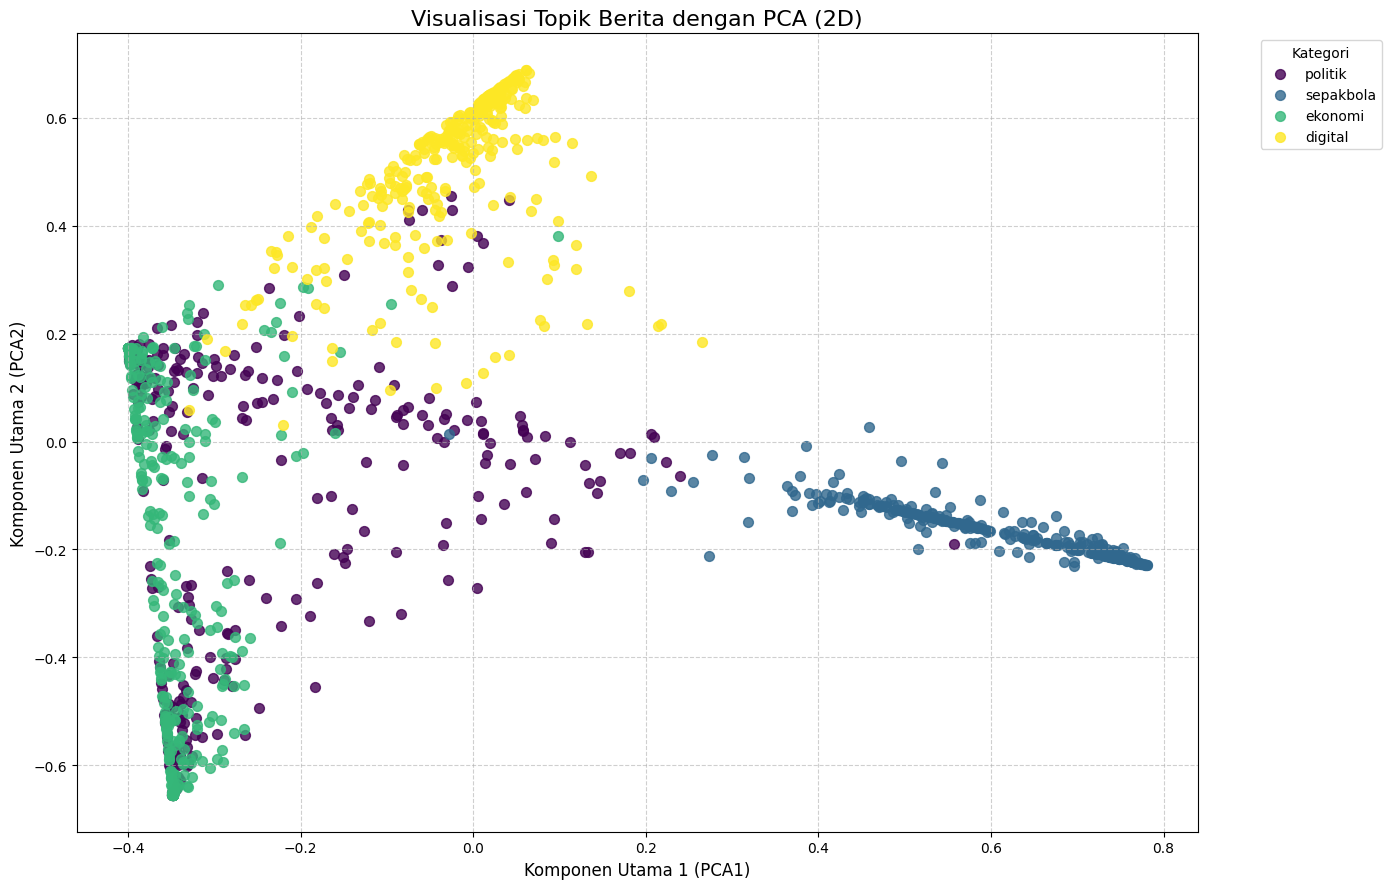

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Pastikan variabel lda_model, corpus_lda, dan df sudah ada dari sel sebelumnya

try:
    # --- 1. Mendapatkan Distribusi Topik untuk Setiap Dokumen ---
    print("Mengekstrak distribusi topik untuk setiap dokumen...")
    topic_distributions = []
    # Dapatkan distribusi topik untuk setiap dokumen dalam korpus
    for doc_bow in corpus_lda:
        doc_topics = lda_model.get_document_topics(doc_bow, minimum_probability=0)
        # Buat list probabilitas yang urut sesuai jumlah topik
        topic_prob = [prob for topic_id, prob in doc_topics]
        topic_distributions.append(topic_prob)

    # Ubah menjadi matriks numpy untuk diproses PCA
    topic_matrix = np.array(topic_distributions)
    print("✅ Matriks distribusi topik berhasil dibuat.")

    # --- 2. Menerapkan PCA (Principal Component Analysis) ---
    print("\n🔬 Menerapkan PCA untuk reduksi dimensi ke 2D...")
    # Inisialisasi PCA untuk menghasilkan 2 komponen utama
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(topic_matrix)
    print("✅ PCA selesai.")

    # --- 3. Mempersiapkan Data untuk Plotting ---
    # Buat DataFrame baru untuk hasil PCA
    df_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
    # Tambahkan kolom kategori asli dari DataFrame awal
    df_pca['kategori'] = df['kategori'].reset_index(drop=True)
    print("\nData siap untuk divisualisasikan.")

    # --- 4. Visualisasi dengan Matplotlib ---
    print("\n🎨 Membuat plot visualisasi PCA...")
    plt.figure(figsize=(14, 9))

    kategori_unik = df_pca['kategori'].unique()
    colors = plt.cm.get_cmap('viridis', len(kategori_unik))

    # Plot setiap kategori dengan warna yang berbeda
    for i, kategori in enumerate(kategori_unik):
        subset = df_pca[df_pca['kategori'] == kategori]
        plt.scatter(subset['PCA1'], subset['PCA2'], color=colors(i), label=kategori, alpha=0.8, s=50)

    plt.title('Visualisasi Topik Berita dengan PCA (2D)', fontsize=16)
    plt.xlabel('Komponen Utama 1 (PCA1)', fontsize=12)
    plt.ylabel('Komponen Utama 2 (PCA2)', fontsize=12)
    plt.legend(title='Kategori', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Simpan plot sebagai gambar
    plt.savefig("lda_pca_matplotlib.png")
    print("\n✨ Visualisasi berhasil dibuat dan disimpan sebagai 'lda_pca_matplotlib.png'.")
    plt.show()

except NameError as e:
    print(f"❌ ERROR: Variabel yang dibutuhkan tidak ditemukan ({e}). Pastikan Anda sudah menjalankan sel pelatihan LDA sebelumnya.")
except Exception as e:
    print(f"❌ Terjadi kesalahan: {e}")

dapat kita lihat di atas, ternyata topik politik seringkali berada di cluster ekonomi dan digital, sedangkan sepakbola relatif dapat terpisah dari cluster lain nya

In [ ]:
# Pastikan variabel 'df', 'lda_model', dan 'corpus_lda' masih ada dari sel sebelumnya

try:
    # --- 1. Tentukan Topik Dominan untuk Setiap Dokumen ---
    print("🔬 Menentukan topik dominan untuk setiap berita...")
    dominant_topics = []
    for doc_bow in corpus_lda:
        top_topic = sorted(lda_model.get_document_topics(doc_bow), key=lambda x: x[1], reverse=True)[0]
        dominant_topics.append(top_topic[0]) # Ambil hanya nomor topiknya

    df['dominant_topic'] = dominant_topics
    print("✅ Topik dominan berhasil ditentukan.")

    # --- 2. Tampilkan Korelasi Kategori vs. Topik ---
    print("\n--- Tabel Korelasi: Kategori Asli vs. Topik Dominan LDA ---")

    # Membuat tabel kontingensi untuk melihat distribusinya
    topic_category_crosstab = pd.crosstab(df['kategori'], df['dominant_topic'])
    display(topic_category_crosstab)

    # --- 3. Tampilkan Kata Kunci untuk Interpretasi ---
    print("\n--- Kata Kunci (Keywords) untuk Setiap Topik ---")
    print("Gunakan ini untuk memberi nama pada setiap nomor topik di tabel atas.")
    topics = lda_model.print_topics(num_words=7) # Ambil 7 kata teratas
    for topic_num, topic_words in topics:
        print(f"Topik {topic_num}: {topic_words}")

except (NameError, KeyError) as e:
    print(f"❌ ERROR: Variabel atau kolom yang dibutuhkan tidak ditemukan. Pastikan sel sebelumnya berhasil dijalankan. Detail: {e}")

🔬 Menentukan topik dominan untuk setiap berita...
✅ Topik dominan berhasil ditentukan.

--- Tabel Korelasi: Kategori Asli vs. Topik Dominan LDA ---


dominant_topic,0,1,2,3,4
kategori,,,,,
digital,32,0,0,261,7
ekonomi,138,158,0,4,0
politik,154,108,4,11,23
sepakbola,1,0,183,0,116



--- Kata Kunci (Keywords) untuk Setiap Topik ---
Gunakan ini untuk memberi nama pada setiap nomor topik di tabel atas.
Topik 0: 0.011*"”" + 0.010*"“" + 0.009*"indonesia" + 0.006*"program" + 0.006*"oktob" + 0.006*"pemerintah" + 0.005*"nomor"
Topik 1: 0.024*"rp" + 0.021*"persen" + 0.013*"bank" + 0.013*"triliun" + 0.012*"pemerintah" + 0.011*"dana" + 0.009*"”"
Topik 2: 0.020*"indonesia" + 0.015*"pertandingan" + 0.015*"laga" + 0.015*"gol" + 0.013*"timna" + 0.013*"pemain" + 0.012*"piala"
Topik 3: 0.020*"pengguna" + 0.016*"ai" + 0.014*"fitur" + 0.010*"aplikasi" + 0.010*"googl" + 0.007*"konten" + 0.006*"”"
Topik 4: 0.014*"game" + 0.013*"pemain" + 0.011*"liga" + 0.008*"inggri" + 0.007*"roblox" + 0.007*"serangan" + 0.007*"”"
